In [8]:
import abtem
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read

abtem.config.set({"local_diagnostics.progress_bar": False});

## Partial coherence with plane waves

In [9]:
exit_wave = abtem.PlaneWave(energy=200e3, sampling=0.05).multislice(
    read("./data/STO_LTO.cif")
)

### Partial temporal coherence with plane waves

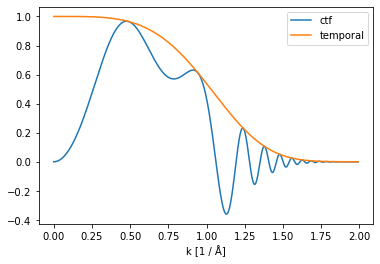

In [134]:
Cs = -30e-6 * 1e10

ctf_quasi_coherent = abtem.CTF(Cs=Cs, energy=200e3)
ctf_quasi_coherent.defocus = ctf_quasi_coherent.scherzer_defocus
ctf_quasi_coherent.focal_spread = 20

image_quasi_coherent = exit_wave.apply_ctf(ctf_quasi_coherent).intensity()

ctf_quasi_coherent.profiles().show();

In [135]:
ctf_incoherent = abtem.CTF(Cs=Cs, energy=200e3)

defocus = abtem.distributions.gaussian(
    center=ctf_incoherent.scherzer_defocus, standard_deviation=25, num_samples=31
)

ctf_incoherent.defocus = defocus

image_incoherent = exit_wave.apply_ctf(ctf_incoherent).intensity().sum(0)

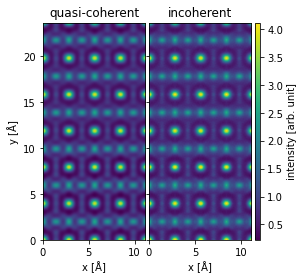

In [136]:
abtem.stack(
    [image_quasi_coherent, image_incoherent], ("quasi-coherent", "incoherent")
).show(
    common_color_scale=True,
    explode=True,
    cbar=True,
    image_grid_kwargs={"axes_pad": 0.05},
);